### CNN networks on MNIST dataset

In [0]:
import matplotlib.pyplot as plt
from keras.utils import np_utils 
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import he_normal

import seaborn as sns
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print("Training data shape: ", X_train.shape) 
print("Test data shape", X_test.shape)

print("Training label shape: ", y_train.shape) 
print("First 5 training labels: ", y_train[:5]) 

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training label shape:  (60000,)
First 5 training labels:  [5 0 4 1 9]


In [0]:
num_classes = 10
batch_size = 128
epochs = 10

In [0]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

 Model 1:CNN with 3 ConvNet & 3x3 kernel size

In [0]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.25))

convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)            

In [0]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet_3=convnet3.fit(X_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_test, y_test))
score = convnet3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 499s 8ms/step - loss: 0.1778 - acc: 0.9455 - val_loss: 0.0477 - val_acc: 0.9846
Epoch 2/10
60000/60000 [==============================] - 496s 8ms/step - loss: 0.0620 - acc: 0.9815 - val_loss: 0.0332 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 494s 8ms/step - loss: 0.0439 - acc: 0.9866 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 4/10
60000/60000 [==============================] - 492s 8ms/step - loss: 0.0376 - acc: 0.9886 - val_loss: 0.0267 - val_acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 493s 8ms/step - loss: 0.0291 - acc: 0.9914 - val_loss: 0.0238 - val_acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 492s 8ms/step - loss: 0.0259 - acc: 0.9920 - val_loss: 0.0234 - val_acc: 0.9923
Epoch 7/10
60000/60000 [==============================] - 495s 8ms/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0235 - 

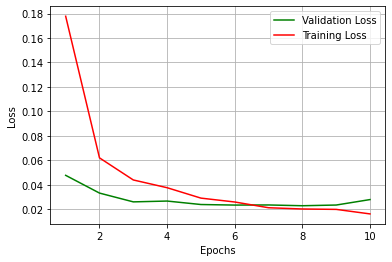

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,epochs+1))

train_loss = convnet_3.history['loss']
val_loss = convnet_3.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

Model2:CNN with 5 ConvNet & kernel_size=(5x5)

5 convNet followed by maxpooling(2,2) and dropout

---



In [0]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(32,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#Second Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(96,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(164,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 96)         

In [0]:
#Model compilation
from datetime import datetime
start = datetime.now()
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet_5=convnet5.fit(X_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_test, y_test))
score = convnet5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Time taken to run this cell :", datetime.now() - start)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 909s 15ms/step - loss: 2.1667 - acc: 0.2810 - val_loss: 1.3325 - val_acc: 0.5119
Epoch 2/10
60000/60000 [==============================] - 909s 15ms/step - loss: 1.1052 - acc: 0.6127 - val_loss: 0.7686 - val_acc: 0.7257
Epoch 3/10
60000/60000 [==============================] - 914s 15ms/step - loss: 0.6110 - acc: 0.7982 - val_loss: 0.3284 - val_acc: 0.8985
Epoch 4/10
60000/60000 [==============================] - 912s 15ms/step - loss: 0.4228 - acc: 0.8671 - val_loss: 0.2286 - val_acc: 0.9257
Epoch 5/10
60000/60000 [==============================] - 921s 15ms/step - loss: 0.2741 - acc: 0.9180 - val_loss: 0.1281 - val_acc: 0.9592
Epoch 6/10
60000/60000 [==============================] - 924s 15ms/step - loss: 0.1998 - acc: 0.9416 - val_loss: 0.0939 - val_acc: 0.9702
Epoch 7/10
60000/60000 [==============================] - 924s 15ms/step - loss: 0.1586 - acc: 0.9529 - val_loss: 0.

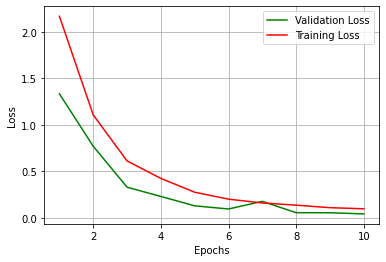

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,epochs+1))

train_loss = convnet_5.history['loss']
val_loss = convnet_5.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

**Model3:CNN with 7 ConvNet & kernel_size=(2x2)**


5 convNet followed by maxpooling(2,2) and dropout

In [0]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))


convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))#Second Convnet
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
#convnet7.add(Dropout(0.25))

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
#convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.15))

convnet7.add(Conv2D(96,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fourth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))
convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#fifth Convnet
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))#sixth Convnet
convnet7.add(Conv2D(164,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))#seventh Convnet

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(148,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 96)          0         

In [0]:
#Model compilation
from datetime import datetime
start=datetime.now()
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(X_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(X_test, y_test))
score = convnet7.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Time taken to run this cell :", datetime.now() - start)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 139s 2ms/step - loss: 1.9793 - acc: 0.3450 - val_loss: 1.4521 - val_acc: 0.4926
Epoch 2/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.5178 - acc: 0.8413 - val_loss: 0.0957 - val_acc: 0.9722
Epoch 3/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2094 - acc: 0.9445 - val_loss: 0.0666 - val_acc: 0.9812
Epoch 4/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1483 - acc: 0.9623 - val_loss: 0.0482 - val_acc: 0.9874
Epoch 5/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.1184 - acc: 0.9712 - val_loss: 0.0400 - val_acc: 0.9891
Epoch 6/10
60000/60000 [==============================] - 134s 2ms/step - loss: 0.1035 - acc: 0.9748 - val_loss: 0.0347 - val_acc: 0.9911
Epoch 7/10
60000/600

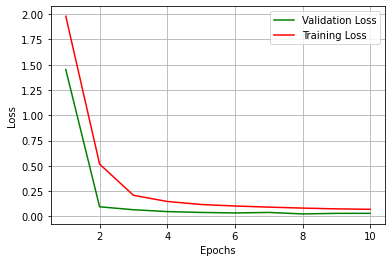

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epochs') ; ax.set_ylabel('Loss')

# list of epoch numbers
list_of_epoch = list(range(1,epochs+1))

train_loss = convnet7_history.history['loss']
val_loss = convnet7_history.history['val_loss']

ax.plot(list_of_epoch, val_loss, 'g', label="Validation Loss")
ax.plot(list_of_epoch, train_loss, 'r', label="Training Loss")
plt.legend()
plt.grid()
plt.show();

**Summary**

In [0]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["MODEL_NAME","TRAINING ACCURACY","TESTING ACCURACY"]
x.add_row(["Cnn with 3 convnet & 3x3 kernel size", 0.9950, 0.9917])
x.add_row(["Cnn with 5 convnet & 5x5 kernel size", 0.9718, 9869])
x.add_row(["Cnn with 7 convnet & 2x2 Kernel size",0.9834, 0.9924])

print(x)

+--------------------------------------+-------------------+------------------+
|              MODEL_NAME              | TRAINING ACCURACY | TESTING ACCURACY |
+--------------------------------------+-------------------+------------------+
| Cnn with 3 convnet & 3x3 kernel size |       0.995       |      0.9917      |
| Cnn with 5 convnet & 5x5 kernel size |       0.9718      |       9869       |
| Cnn with 7 convnet & 2x2 Kernel size |       0.9834      |      0.9924      |
+--------------------------------------+-------------------+------------------+
